In [1]:
import pandas as pd

In [2]:
df = pd.read_excel("ANZ synthesised transaction dataset.xlsx")

In [101]:
df.head()

,status,card_present_flag,bpay_biller_code,account,currency,long_lat,txn_description,merchant_id,merchant_code,first_name,...,age,merchant_suburb,merchant_state,extraction,amount,transaction_id,country,customer_id,merchant_long_lat,movement
0,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,POS,81c48296-73be-44a7-befa-d053f48ce7cd,NaN,Diana,...,26,Ashmore,QLD,2018-08-01T01:01:15.000+0000,16.25,a623070bfead4541a6b0fff8a09e706c,Australia,CUS-2487424745,153.38 -27.99,debit
1,authorized,0.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,830a451c-316e-4a6a-bf25-e37caedca49e,NaN,Diana,...,26,Sydney,NSW,2018-08-01T01:13:45.000+0000,14.19,13270a2a902145da9db4c951e04b51b9,Australia,CUS-2487424745,151.21 -33.87,debit
2,authorized,1.0,NaN,ACC-1222300524,AUD,151.23 -33.94,POS,835c231d-8cdf-4e96-859d-e9d571760cf0,NaN,Michael,...,38,Sydney,NSW,2018-08-01T01:26:15.000+0000,6.42,feb79e7ecd7048a5a36ec889d1a94270,Australia,CUS-2142601169,151.21 -33.87,debit
3,authorized,1.0,NaN,ACC-1037050564,AUD,153.10 -27.66,SALES-POS,48514682-c78a-4a88-b0da-2d6302e64673,NaN,Rhonda,...,40,Buderim,QLD,2018-08-01T01:38:45.000+0000,40.90,2698170da3704fd981b15e64a006079e,Australia,CUS-1614226872,153.05 -26.68,debit
4,authorized,1.0,NaN,ACC-1598451071,AUD,153.41 -27.95,SALES-POS,b4e02c10-0852-4273-b8fd-7b3395e32eb0,NaN,Diana,...,26,Mermaid Beach,QLD,2018-08-01T01:51:15.000+0000,3.25,329adf79878c4cf0aeb4188b4691c266,Australia,CUS-2487424745,153.44 -28.06,debit


In [122]:
l = []
flag = []
for i in range(len(df)):
    if df.iloc[i]['account'] not in flag:
        tmp = {'account':df.iloc[i]['account'], 'age':df.iloc[i]['age'], 'gender':df.iloc[i]['gender']}
        l.append(tmp)
        flag.append(df.iloc[i]['account'])

In [123]:
data = pd.DataFrame(l)

In [124]:
data.index = data.account

In [125]:
l = []
for i in data.index:
    
    d_ = df[df.account==i]
    
    avg_exp = d_[d_.movement=='debit'].amount
    
    l.append(list(avg_exp))
        

In [126]:
data['exp'] = pd.Series(l, index=data.index)

In [127]:
l = []
for i in data.index:
    
    d_ = df[df.account==i]
    
    avg_sal = d_[d_.movement=='credit'].amount.sum()*4
    
    l.append(avg_sal)
    
data['ann_sal'] = pd.Series(l, index=data.index)

In [128]:
data.head()

,account,age,gender,exp,ann_sal
account,,,,,
ACC-1598451071,ACC-1598451071,26,F,"[16.25, 14.19, 3.25, 14.1, 10.67, 11.28, 8.99,...",56765.52
ACC-1222300524,ACC-1222300524,38,M,"[6.42, 5.46, 7.4, 17.1, 24.74, 11.12, 19.85, 1...",52110.76
ACC-1037050564,ACC-1037050564,40,F,"[40.9, 45.12, 32.0, 11.05, 65.11, 46.83, 44.39...",46388.68
ACC-1608363396,ACC-1608363396,20,M,"[163.0, 13.52, 24.0, 43.38, 25.83, 10.48, 19.1...",55687.20
ACC-2776252858,ACC-2776252858,43,F,"[61.06, 15.61, 29.0, 197.0, 43.0, 17.22, 28.56...",59810.24


In [129]:
data = data.drop('account', axis=1)

In [116]:
import matplotlib.pyplot as plt

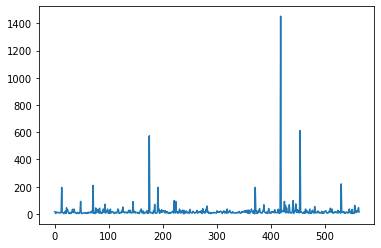

In [121]:
plt.plot(data.loc['ACC-1598451071'].avg_exp)

In [143]:
l = []
for i in data.index:
    
    d_ = df[df.account==i]
    
    x = d_.long_lat.unique()[0]
    avg_sal = x.split()
    
    l.append(avg_sal)
    
data['long_lat'] = pd.Series(l, index=data.index)

In [144]:
data.head()

,age,gender,exp,ann_sal,long_lat
account,,,,,
ACC-1598451071,26,F,"[16.25, 14.19, 3.25, 14.1, 10.67, 11.28, 8.99,...",56765.52,"[153.41, -27.95]"
ACC-1222300524,38,M,"[6.42, 5.46, 7.4, 17.1, 24.74, 11.12, 19.85, 1...",52110.76,"[151.23, -33.94]"
ACC-1037050564,40,F,"[40.9, 45.12, 32.0, 11.05, 65.11, 46.83, 44.39...",46388.68,"[153.10, -27.66]"
ACC-1608363396,20,M,"[163.0, 13.52, 24.0, 43.38, 25.83, 10.48, 19.1...",55687.20,"[151.22, -33.87]"
ACC-2776252858,43,F,"[61.06, 15.61, 29.0, 197.0, 43.0, 17.22, 28.56...",59810.24,"[144.95, -37.76]"


In [148]:
l1 = []
l2 = []

for i in data.long_lat:
    
    long = float(i[0])
    lat = float(i[1])
    
    l1.append(long)
    l2.append(lat)
    

In [150]:
max(l1)

255.0

(array([17., 82.,  0.,  0.,  0.,  1.]),
 array([114.62      , 138.01666667, 161.41333333, 184.81      ,
        208.20666667, 231.60333333, 255.        ]),
 <a list of 6 Patch objects>)

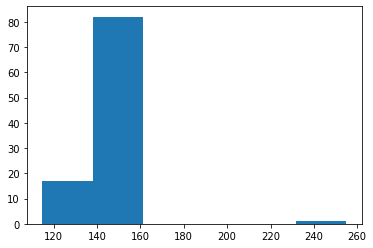

In [154]:
plt.hist(l1, bins=6)